# Titanic - Machine Learning from Disaster
      
##      Análise Exploratória de dados (AED) - Analise Descritiva
  
####      Tem por objetivo organizar, descrever e apresentar o conjunto de dados do Titanic,  em tabelas, gráficos e medidas de resumo.


![titanic-bg.jpg](titanic-bg.jpg)

O desafio Titanic - Machine Learning from Disaster é um dos casos mais populares e desafiadores no campo da ciência de dados e aprendizado de máquina. Baseado no trágico naufrágio do RMS Titanic em 1912, o conjunto de dados proporciona uma oportunidade única para explorar padrões, extrair insights e desenvolver modelos preditivos que possam prever quais passageiros sobreviveram à tragédia.

Nesta jornada de análise exploratória de dados, mergulharemos profundamente no conjunto de dados do Titanic para entender suas nuances, características e potenciais insights. Nosso objetivo é preparar o terreno para a construção de modelos preditivos robustos que possam prever com precisão a sobrevivência dos passageiros com base em várias variáveis.

Ao longo desta análise, examinaremos uma variedade de aspectos, desde informações básicas sobre os passageiros até padrões mais complexos de sobrevivência. Utilizaremos ferramentas poderosas, como visualizações gráficas, estatísticas descritivas e correlações entre variáveis para obter uma compreensão abrangente dos dados.

Além disso, exploraremos questões importantes, como a distribuição de idades e gêneros entre os passageiros, a relação entre a classe do bilhete e a sobrevivência, e quais outros fatores podem ter influenciado as chances de sobrevivência no desastre do Titanic.

A Análise Exploratória de Dados desempenha um papel fundamental na construção de modelos de aprendizado de máquina eficazes, pois nos ajuda a compreender a natureza dos dados e a identificar padrões e relacionamentos importantes. Ao final desta jornada, estaremos preparados para iniciar a construção e treinamento de modelos preditivos que possam oferecer insights valiosos sobre a tragédia do Titanic e ajudar a honrar a memória daqueles que estiveram a bordo.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_train='./data/train.csv'
file_test='./data/test.csv'

seed = 69
np.random.seed(seed)

train_df = pd.read_csv(file_train,index_col='PassengerId')
test_df = pd.read_csv(file_test,index_col='PassengerId')

#### No conjunto de dados do Titanic, as variáveis e suas respectivas descrições são as seguintes:

In [122]:
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Survived:** Indica se o passageiro sobreviveu (1) ou não (0).<br>
**Pclass:** Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe).<br>
**Name:** Nome do passageiro.<br>
**Sex:** Gênero do passageiro.<br>
**Age:** Idade do passageiro em anos.<br>
**SibSp:** Número de irmãos/cônjuges a bordo do Titanic.<br>
**Parch:** Número de pais/filhos a bordo do Titanic.<br>
**Ticket:** Número do bilhete.<br>
**Fare:** Tarifa paga pelo passageiro.<br>
**Cabin:** Número da cabine do passageiro.<br>
**Embarked:** Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).

Essas são as variáveis presentes no conjunto de dados do Titanic e fornecem informações sobre diferentes aspectos dos passageiros, incluindo detalhes demográficos, socioeconômicos e de viagem. Essas variáveis serão exploradas durante a análise para entender melhor os padrões e fatores que influenciaram a sobrevivência no desastre do Titanic.

In [123]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
num_registros, num_colunas = train_df.shape

print("Número de registros:", num_registros)
print("Número de colunas:", num_colunas)

Número de registros: 891
Número de colunas: 11


#### Estatísticas descritivas resumidas para as colunas numéricas do conjunto de dados.

In [125]:
train_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


#### Resumo conciso das informações sobre o conjunto de dados.

In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Quantidade de dados faltantes ou NA`s ou missings values:

In [127]:
train_df.isna().sum()/len(train_df)*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

#### Preencher os valores ausentes na idade com estimativas razoáveis.

Preencher o campo de idade na base de treinamento do Titanic é crucial para garantir que os dados sejam completos e representativos, possibilitando análises precisas e a construção de modelos preditivos eficazes.

Temos aproximadamente 20% dos registros com valores de idade faltantes. Para preencher esses valores em falta, utilizamos a mediana das idades de cada grupo correlacionado. As variáveis correlacionadas incluem: [Survived, Pclass, Sex, SibSp e Parch].

In [128]:
def define_medians_age_train(df):
    return df.groupby(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'])['Age'].transform('median')


# train_df.fillna({'Age': define_medians_age_train(train_df)}, inplace = True)
train_df.fillna({'Age': train_df['Age'].median()}, inplace = True)
test_df.fillna({'Age': test_df['Age'].median()}, inplace = True)

Para os 10 registros restantes aos quais não foi atribuído valor durante a primeira correlação, uma nova análise de correlação foi realizada usando as variáveis [Survived, Pclass, Sex] para atribuir valores aos registros faltantes.

In [129]:
# def define_medians_age_correlation(df):
#     return df.groupby(['Survived','Pclass', 'Sex'])['Age'].transform('median')

# def define_medians_age_correlation_test(df):
#     return df.groupby(['Pclass', 'Sex'])['Age'].transform('median')

# train_df.fillna({'Age': define_medians_age_correlation(train_df)}, inplace = True)
# test_df.fillna({'Age': define_medians_age_correlation_test(test_df)}, inplace = True)

## Análise Gráfica

A análise gráfica desempenha um papel fundamental na compreensão dos dados, na identificação de padrões e outliers, na visualização de relações entre variáveis e na comunicação de resultados, tornando-se uma etapa essencial no processo de AED.

In [130]:
sns.set(style="darkgrid")

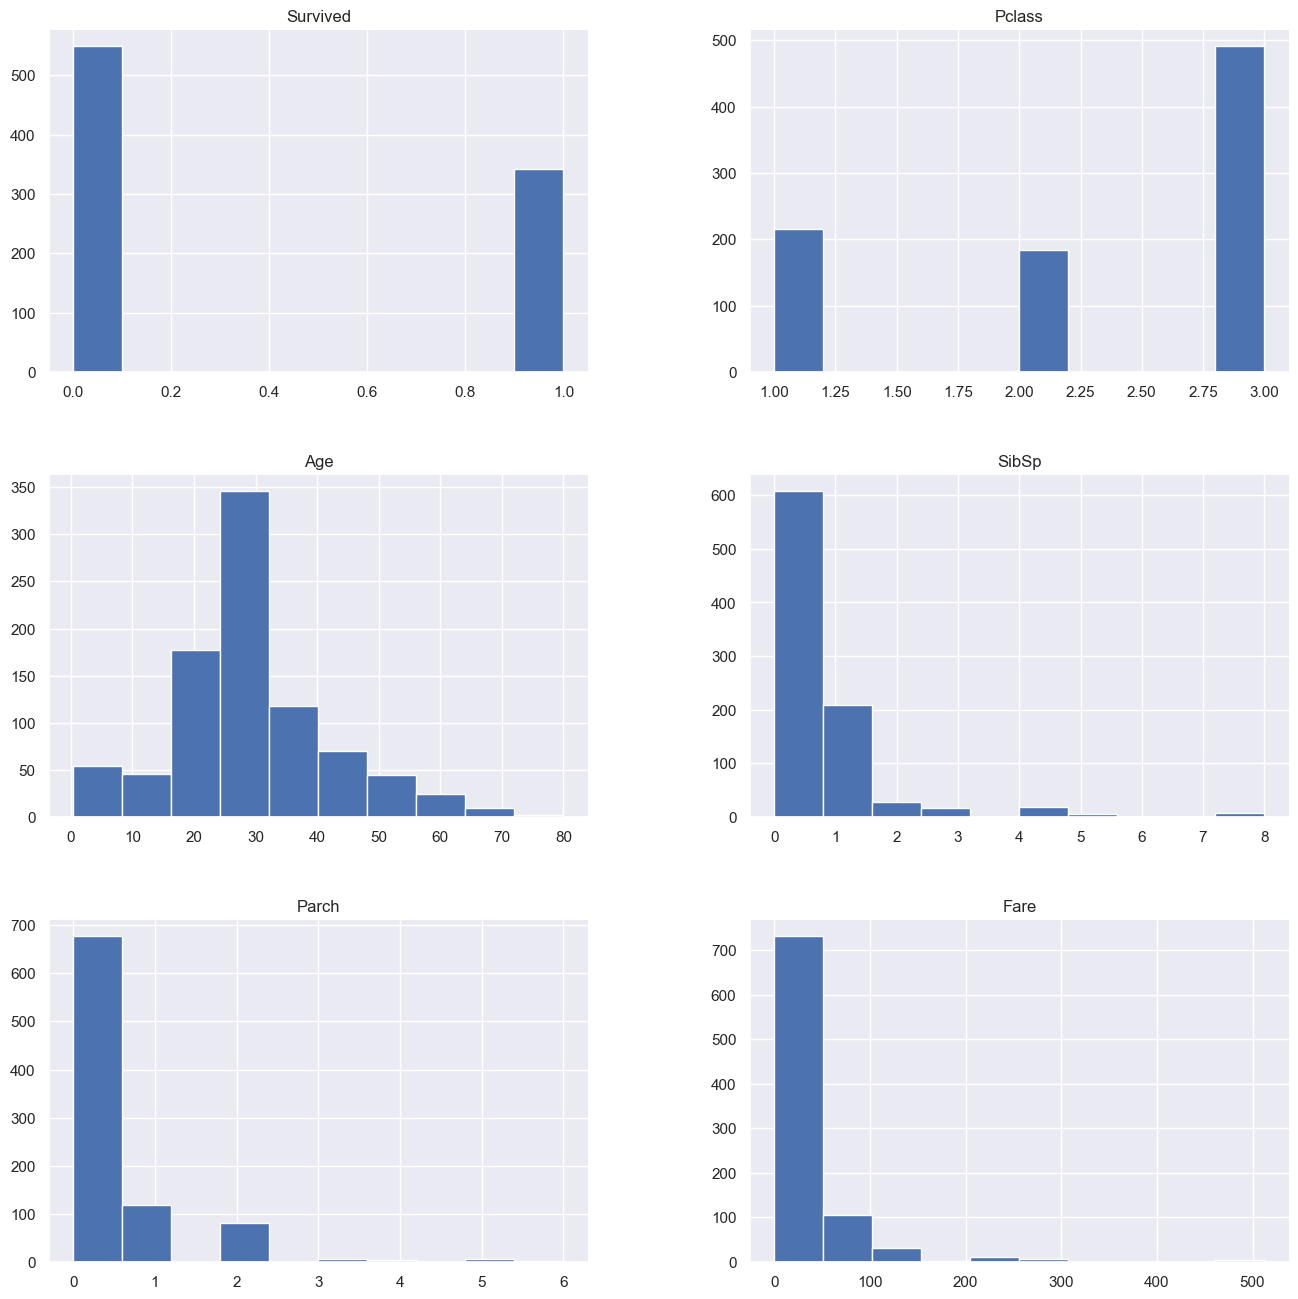

In [131]:
train_df.hist(figsize=(16, 16))
sns.despine()

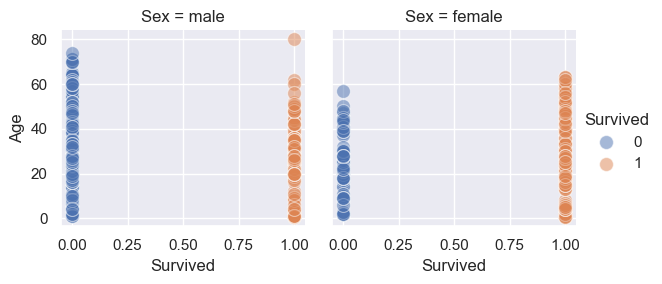

In [132]:
g = sns.FacetGrid(train_df, col="Sex", hue="Survived")
g.map(sns.scatterplot, "Survived", "Age", s=100, alpha=.5)
g.add_legend()
sns.despine()

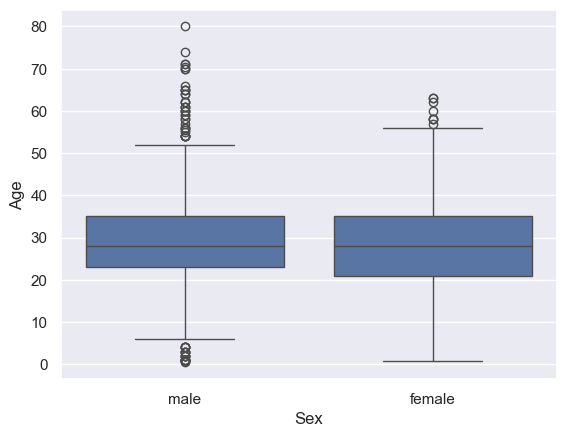

In [133]:
sns.boxplot(x='Sex', y='Age', data=train_df);

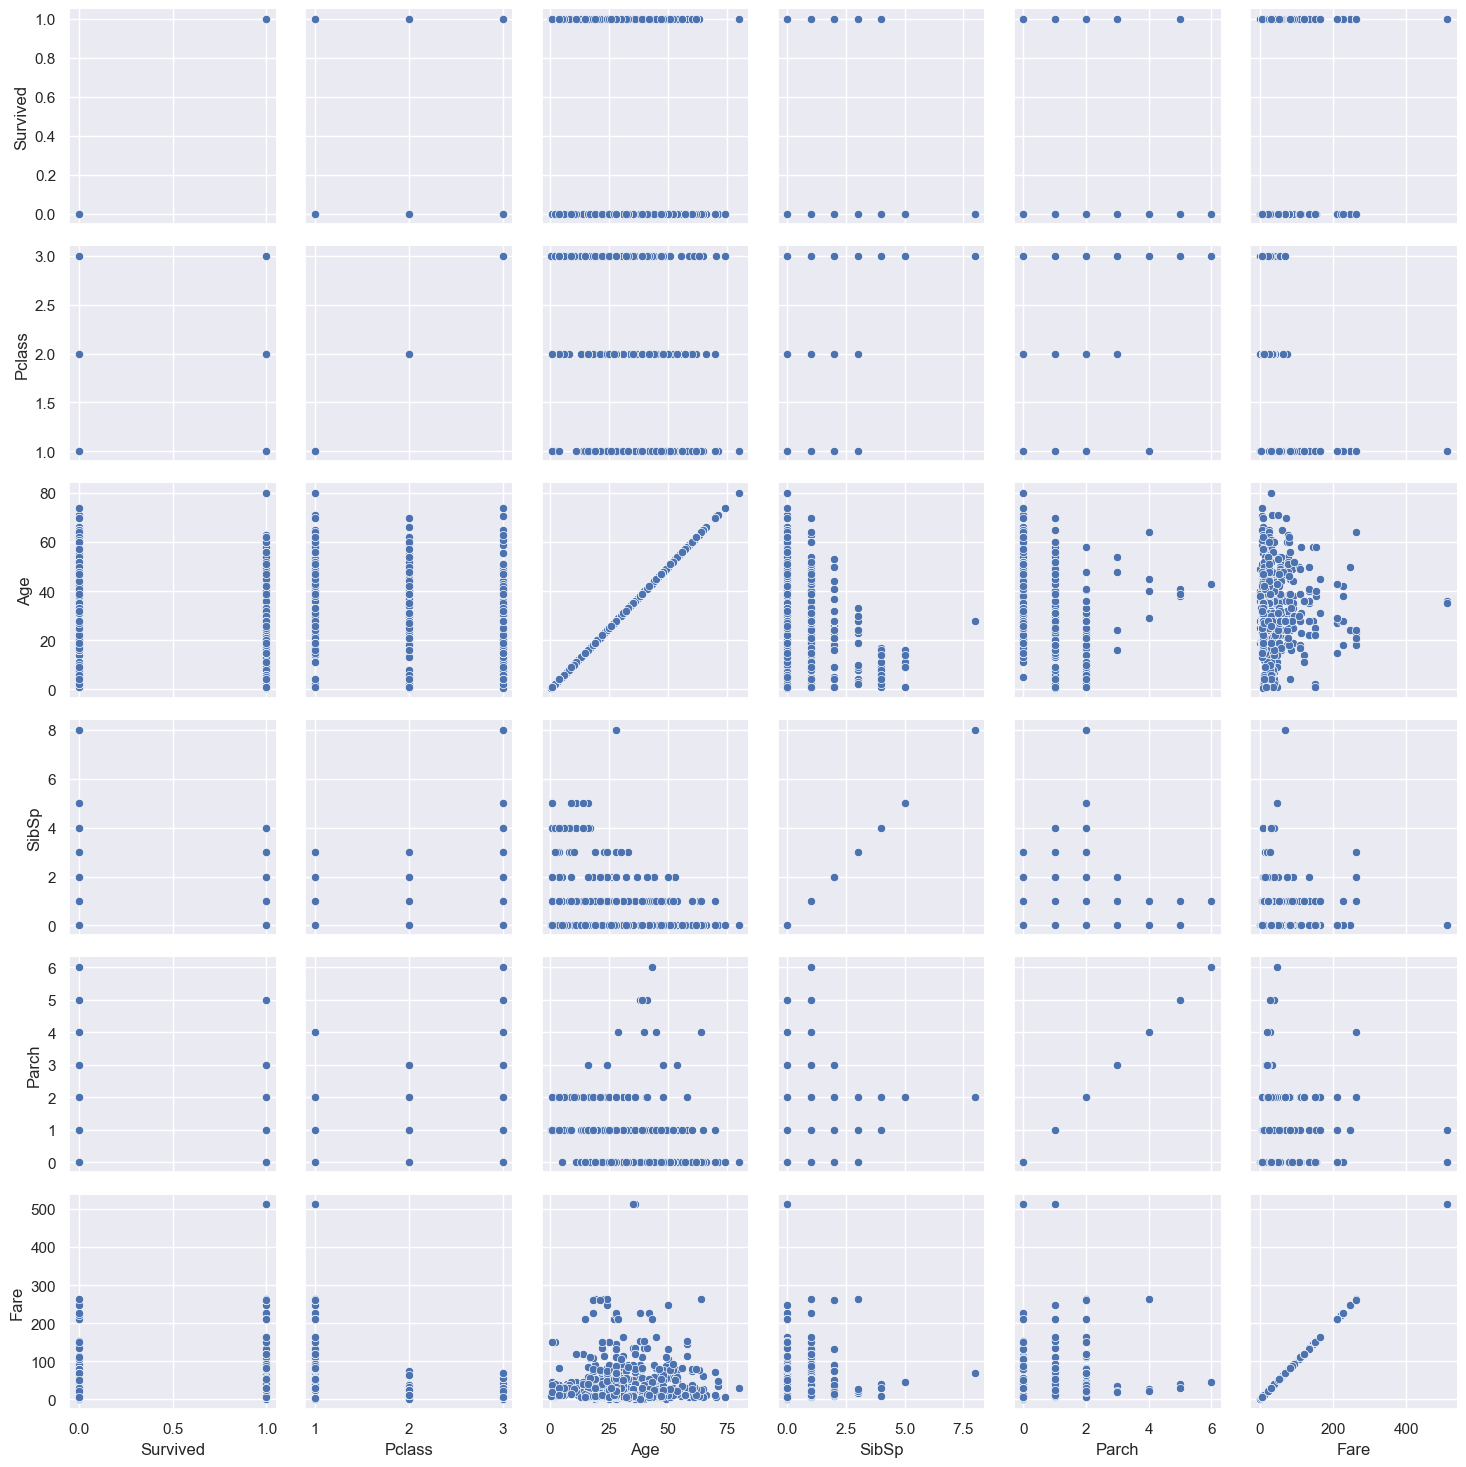

In [134]:
g = sns.PairGrid(train_df)
g.map(sns.scatterplot)
sns.despine()

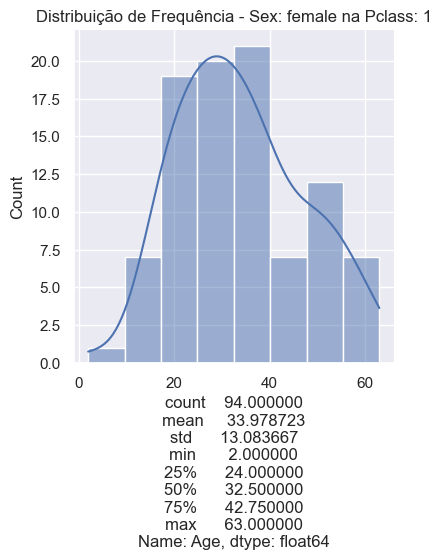

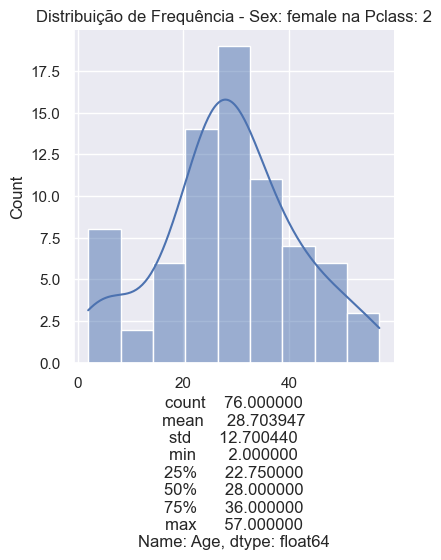

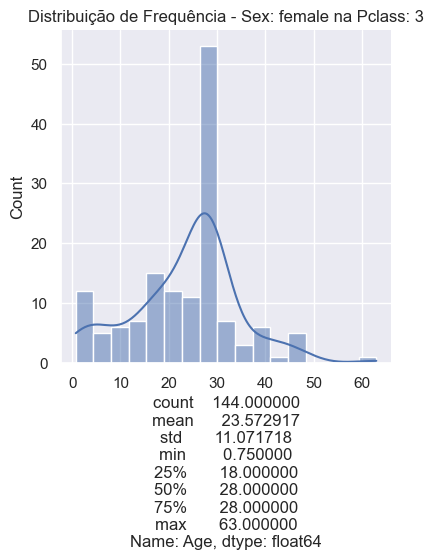

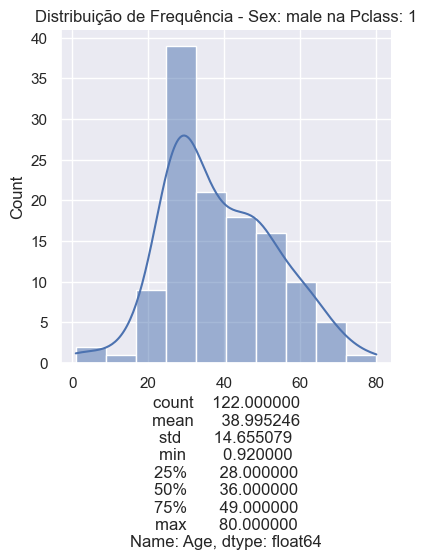

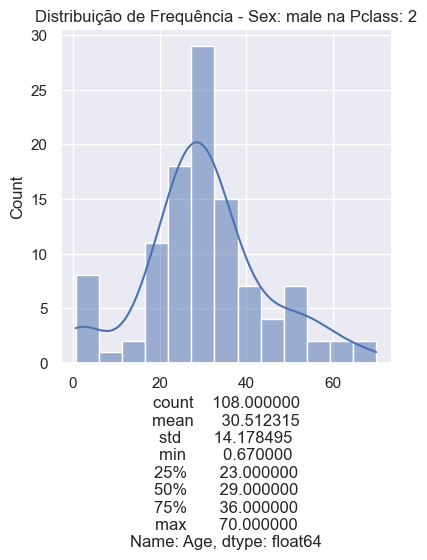

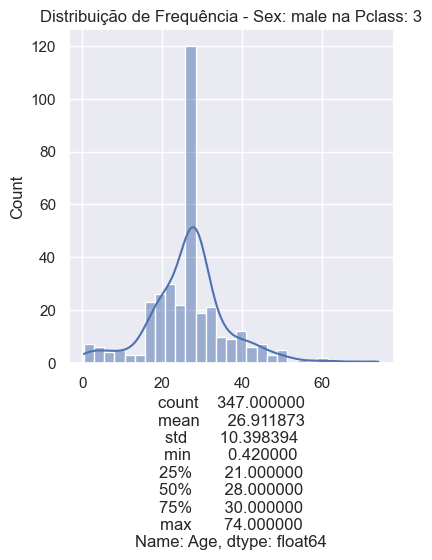

In [135]:
# Plota uma distribuição de frequência de Idade filtrando por Sexo e Classe
def displot_filter_ages_to_sex_and_pclass(sex_id, pclass_id):
    df1 = train_df[train_df['Sex'].isin([sex_id])]
    df2 = df1[df1['Pclass'].isin([pclass_id])]

    ax = sns.displot(df2['Age'], kde=True)

    ax.figure.set_size_inches(4, 4)
    ax.set(title = f'Distribuição de Frequência - Sex: {sex_id} na Pclass: {pclass_id}')
    ax.set(xlabel = f'{df2['Age'].describe()}')
    ax
    
displot_filter_ages_to_sex_and_pclass('female', 1) 
displot_filter_ages_to_sex_and_pclass('female', 2)
displot_filter_ages_to_sex_and_pclass('female', 3)
displot_filter_ages_to_sex_and_pclass('male', 1)
displot_filter_ages_to_sex_and_pclass('male', 2)
displot_filter_ages_to_sex_and_pclass('male', 3)

## Preparar os dados para serem inseridos nos modelos

A preparação de dados desempenha um papel fundamental na criação de modelos de machine learning eficazes, garantindo que os dados estejam limpos, formatados corretamente e contenham as características mais relevantes para o problema em questão. Isso leva a modelos mais precisos, robustos e capazes de lidar com uma variedade de situações do mundo real.

In [136]:
def prepare_data(df):
    # Remove colunas não relevantes
    df.drop(['Name', 'Ticket', 'Cabin'], axis = 'columns', inplace = True)

    # Binariza o valor de Sex
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

    # Preencha os dados faltantes: media em Fare e com valores mais frequentes em Embarked 
    df[['Fare']] = df[['Fare']].fillna(value=df[df['Fare'] < 50]['Fare'].mean())
    df['Fare'] = df['Fare'].apply(lambda x: 0 if x == 0 else np.log(x))
    df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())

    # Converter [Embarked] para "one-hot"
    enbarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked', dtype=int)
    df.drop('Embarked', axis= 'columns', inplace = True)
    df = df.join(enbarked_one_hot)

    # Define index ao [PasseId]
    df.rename_axis(None, axis = 'rows', inplace = True)
    df.rename_axis('PasserId', axis = 'columns', inplace = True)

    return df

train_df = prepare_data(train_df)
test_df = prepare_data(test_df)

In [137]:
train_df.head(10).T

,1,2,3,4,5,6,7,8,9,10
PasserId,,,,,,,,,,
Survived,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000
Sex,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Age,22.000000,38.000000,26.000000,35.000000,35.000000,28.000000,54.000000,2.000000,27.000000,14.000000
SibSp,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
Parch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
Fare,1.981001,4.266662,2.070022,3.972177,2.085672,2.135148,3.948596,3.048088,2.409941,3.403555
Embarked_C,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


## Testando modelo

In [138]:
# X contem todas as colunas exceto a coluna 'Survived'  
x = train_df.drop(['Survived'], axis=1).values.astype(float)

# Y preenchido com os dados da coluna 'Survived'
y = train_df['Survived'].values

#### Floresta Aleatória (Random Forest)

É uma técnica de ensemble learning que combina várias árvores de decisão para melhorar o desempenho e a generalização do modelo. Pode lidar bem com dados não lineares e é menos propenso a overfitting do que uma única árvore de decisão.

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_parameters = {"max_depth": [None, 10, 20]
                ,"min_samples_split" :[2, 5, 10]
                ,"n_estimators" : [50, 100, 150]
                ,"min_samples_leaf": [1, 2, 4]
                ,'max_features': [8, "sqrt"]
                ,"criterion": ['gini', 'entropy']} 

# Criação do modelo
model = RandomForestClassifier(random_state = seed)
rf_grid = GridSearchCV(model, rf_parameters, n_jobs = -1, cv = 10)
rf_grid.fit(x,y)

print("Acurâcia: ", rf_grid.best_score_)
print('Melhores parameteros RF: ', rf_grid.best_params_)

rf_clf = RandomForestClassifier(**rf_grid.best_params_)
rf_clf.fit(x,y)

Acurâcia:  0.845143570536829
Melhores parameteros RF:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=150)

## Gerar dados para submissão

Aplicar o modelo treinado a um novo conjunto de dados (normalmente chamado de conjunto de teste) e produzir previsões para os resultados esperados com base nas características fornecidas.

In [140]:
X_test = test_df.values.astype(float)


print('** Prever Sobrevivência para dados com idade usando RF ', rf_grid.best_params_)
prediction_result = rf_clf.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': prediction_result,
})
    
submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('submission-input.csv', index=False)

** Prever Sobrevivência para dados com idade usando RF  {'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
